## 10 - Python Finance

**Capitulo 10**: A API do Banco Central do Brasil fornece indicadores econômicos e financeiros mais variados como: 

Inflação: IPCA, INCC, IGP-M. Taxa de desemprego PNAD Contínua, CDI, SELIC, etc.

Realizar analise e plotar um gráfico comparando o rendimento histórico do Índice Bovespa (IBOV) com a renda fixa (CDI).

## 1. Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 8)

## 2. Obtendo Dados através da API do Banco Central do Brasil

In [2]:
url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.20542/dados?formato=json'

In [4]:
df = pd.read_json(url)
df

,data,valor
0,01/03/2007,490460
1,01/04/2007,505753
2,01/05/2007,514647
3,01/06/2007,525046
4,01/07/2007,541348
...,...,...
163,01/10/2020,2226313
164,01/11/2020,2279033
165,01/12/2020,2323255
166,01/01/2021,2316178


In [5]:
# Serie IPCA
url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json'

In [6]:
df = pd.read_json(url)
df

,data,valor
0,01/01/1980,6.62
1,01/02/1980,4.62
2,01/03/1980,6.04
3,01/04/1980,5.29
4,01/05/1980,5.70
...,...,...
489,01/10/2020,0.86
490,01/11/2020,0.89
491,01/12/2020,1.35
492,01/01/2021,0.25


## 2.1 Método obter dados através da API do Banco Central do Brasil

In [7]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

## 3. Exemplo de Consultas à API do Banco Central do Brasil

In [9]:
ipca = consulta_bc(433)
ipca

,valor
data,
1980-01-01,6.62
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70
...,...
2020-10-01,0.86
2020-11-01,0.89
2020-12-01,1.35


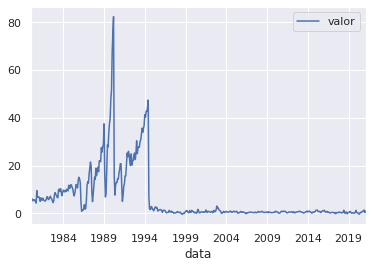

In [14]:
ipca.plot()

In [10]:
igpm = consulta_bc(189)
igpm

,valor
data,
1989-06-01,19.68
1989-07-01,35.90
1989-08-01,36.92
1989-09-01,39.92
1989-10-01,40.64
...,...
2020-11-01,3.28
2020-12-01,0.96
2021-01-01,2.58


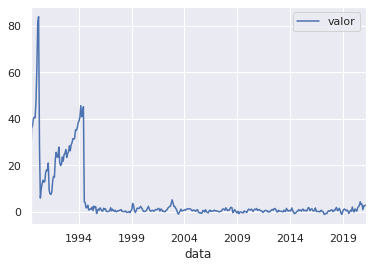

In [15]:
igpm.plot()

In [12]:
incc = consulta_bc(192)
incc

,valor
data,
1944-02-01,0.57
1944-03-01,3.96
1944-04-01,2.33
1944-05-01,-0.54
1944-06-01,1.21
...,...
2020-10-01,1.73
2020-11-01,1.28
2020-12-01,0.70


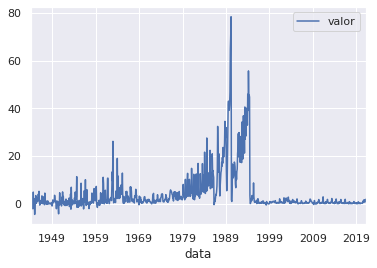

In [16]:
incc.plot()

In [13]:
selic_meta = consulta_bc(432)
selic_meta

,valor
data,
1999-03-05,45.00
1999-03-06,45.00
1999-03-07,45.00
1999-03-08,45.00
1999-03-09,45.00
...,...
2021-05-01,2.75
2021-05-02,2.75
2021-05-03,2.75


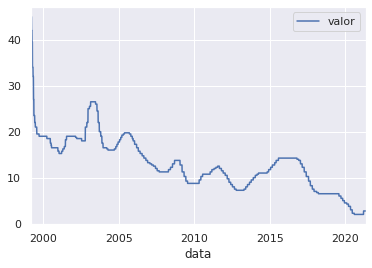

In [17]:
selic_meta.plot()

In [18]:
reservas_internacionais = consulta_bc(13621)
reservas_internacionais

,valor
data,
1998-09-01,65969
1998-09-02,63083
1998-09-03,61984
1998-09-04,60702
1998-09-08,59449
...,...
2021-03-25,350832
2021-03-26,350940
2021-03-29,347663


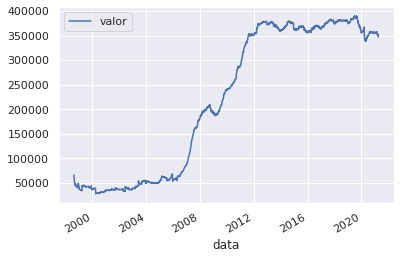

In [19]:
reservas_internacionais.plot()

In [20]:
pnad = consulta_bc(24369)
pnad

,valor
data,
2012-03-01,7.9
2012-04-01,7.7
2012-05-01,7.6
2012-06-01,7.5
2012-07-01,7.4
...,...
2020-08-01,14.4
2020-09-01,14.6
2020-10-01,14.3


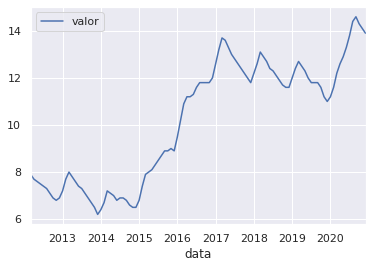

In [21]:
pnad.plot()

## 4. CDI vs IBOV

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [23]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [24]:
ibov_retorno = ibov.pct_change()

In [25]:
ibov_retorno_acumulado = (1 + ibov_retorno).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

In [26]:
ibov_retorno_acumulado

,Adj Close
Date,
1993-04-27,1.000000
1993-04-28,0.991837
1993-04-29,0.967347
1993-04-30,0.983673
1993-05-03,0.983673
...,...
2021-03-26,4684.938776
2021-03-29,4710.979592
2021-03-30,4769.387755


In [27]:
cdi = consulta_bc(12)
cdi

,valor
data,
1986-03-06,0.068111
1986-03-10,0.069028
1986-03-12,0.067417
1986-03-14,0.064584
1986-03-17,0.068222
...,...
2021-03-26,0.010379
2021-03-29,0.010379
2021-03-30,0.010379


In [28]:
cdi_acumulado = (1 + cdi / 100).cumprod()
cdi_acumulado.iloc[0] = 1

In [29]:
cdi_acumulado

,valor
data,
1986-03-06,1.000000e+00
1986-03-10,1.001372e+00
1986-03-12,1.002047e+00
1986-03-14,1.002694e+00
1986-03-17,1.003378e+00
...,...
2021-03-26,6.308603e+10
2021-03-29,6.309258e+10
2021-03-30,6.309913e+10


In [30]:
data_inicio = '2018-01-01'

In [33]:
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

In [34]:
ibov_retorno_acumulado

,Adj Close
Date,
2018-01-02,1.000000
2018-01-03,1.020850
2018-01-04,1.029384
2018-01-05,1.034934
2018-01-08,1.038965
...,...
2021-03-26,1.502330
2021-03-29,1.510680
2021-03-30,1.529410


In [35]:
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

In [36]:
cdi_acumulado

,valor
data,
2018-01-02,1.000000
2018-01-03,1.000529
2018-01-04,1.000794
2018-01-05,1.001058
2018-01-08,1.001323
...,...
2021-03-26,1.164005
2021-03-29,1.164126
2021-03-30,1.164247


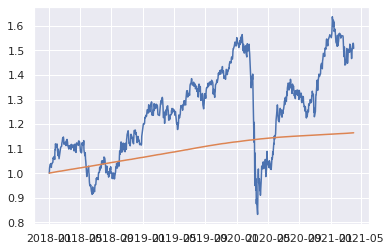

In [37]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);